In [ ]:
### If running on colab
# !pip install patchify


# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# %cd /content/drive/My Drive/Colab_files/ESR
# rel_input_directory = './cropped_plans/'

In [1]:
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from patchify import patchify

In [3]:
rel_input_directory = './../data/plans/3_cropped_plans/'

inputfiles = os.listdir(rel_input_directory)
inputfiles.sort()
inputfiles

['plan01_2019-02_RFC 38-18197-Rebid-Plans_24.png',
 'plan02_2019-06_05-18241-plans_28.png',
 'plan03_2019-06_15-18158-plans_76.png',
 'plan03_2019-06_15-18158-plans_77.png',
 'plan04_2019-06_RFC 15-18248-plans_14.png',
 'plan05_2019-07_VCSLC 16-18700-plans_96.png',
 'plan06_2019-08_13-18177-plans_69.png',
 'plan06_2019-08_13-18177-plans_70.png',
 'plan07_2019-08_Bexar 0915-12-602_62.png',
 'plan07_2019-08_Bexar 0915-12-602_64.png',
 'plan08_2019-08_Culberson 0003-01-055 Vol 2_181.png',
 'plan09_2019-11_201859-20-01-Plans_13.png',
 'plan10_2019-12_201859-20-02-plans_13.png',
 'plan11_2019-12_RFC 031859-20-1-Plans_14.png',
 'plan12_2020-01_091859-20-01-rebid-plans_12.png',
 'plan13_2020-01_381859-06-20-01-Plans_13.png',
 'plan14_2020-01_RFC 381859-20-03-Plans_13.png',
 'plan15_2020-04_18-20050-plans_14.png',
 'plan16_2020-12_16-20026-rebid-plans_30.png',
 'plan17_2020-12_20-20042-plans_16.png']

In [4]:
def split_image(filename, splitxy=608, coverage_flag=1, additional_random_offsets=4):

  image = Image.open(rel_input_directory+filename)
  image = np.asarray(image)
  input_sizex = image.shape[1]
  input_sizey = image.shape[0]

  # check so that the input image is larger than the specified patch size
  if (input_sizex < splitxy) or (input_sizey < splitxy):
    print(f"image {filename} is smaller than the specified filesize. Remove/change this file and try again.")
    return

  # Create list "patches" of specified length, each element containg a set of patches
  # 1 set of patches is the minimum
  # coverage_flag = 1 ensures that the entire image is captured by the patches (-> 2 sets of patches)
  patches = [None]*(1+coverage_flag+additional_random_offsets)
  

  patches[0] = patchify(image, (splitxy, splitxy, 3), step=splitxy)

  if (coverage_flag == 0) and (additional_random_offsets == 0):
      return patches[0]


  translx = input_sizex % splitxy
  transly = input_sizey % splitxy

  if len(patches) > 1:

      # print("coverage_flag1 offsets:", transly, translx)
      patches[1] = patchify(image[transly::,translx::,:], (splitxy, splitxy, 3), step=splitxy)


  if len(patches) > 2:
      for j in range(2,len(patches)):
          transly_rand = int(np.ceil(transly*np.random.rand()))
          translx_rand = int(np.ceil(translx*np.random.rand()))
          # print("additional random offsets:",transly_rand, translx_rand)

          patches[j] = patchify(image[transly_rand::,translx_rand::,:], (splitxy, splitxy, 3), step=splitxy)

  return patches



In [34]:
def plot_patches(patches_list):

  for n in range(len(patches_list)):

      patches = patches_list[n]

      plt.figure(figsize=(16,round(16*patches.shape[0]/patches.shape[1], 1)))
      k=1

      for i in range(patches.shape[0]):
          for j in range(patches.shape[1]):
              patch = Image.fromarray(patches[i, j, 0])

              plt.subplot(patches.shape[0], patches.shape[1], k)
              plt.imshow(patch)
              plt.xticks([])
              plt.yticks([])

              if i == j == 0:
                  plt.title(f"Set of patches {n+1}/{len(patches_list)}")

              k+=1
              
      plt.tight_layout()

In [7]:
def create_save_patches(output_path):

  plan_cnt = 1
  
  

  for filename in inputfiles: # looping over files

      out = split_image(filename)
      letter_ind = 'abcdefghijk'
      patches_ind = 0
      

      for patches in out: # looping over sets of patches per file

          patch_cnt = 1

          for i in range(patches.shape[0]):
              for j in range(patches.shape[1]):
                  patch = Image.fromarray(patches[i, j, 0])

                  outputfile_prefix = filename[0:7]+"patch_"+str(patch_cnt).zfill(3)+letter_ind[patches_ind]+"_"
                  # print(outputfile_prefix)
                  patch.save(output_path+outputfile_prefix +filename[7::])
                  patch_cnt += 1

          patches_ind += 1

      plan_cnt += 1


In [11]:
output_path = './../data/plans/4_cropped_plan_patches/'
# ! rm ./cropped_plan_patches/* # google drive

create_save_patches(output_path)

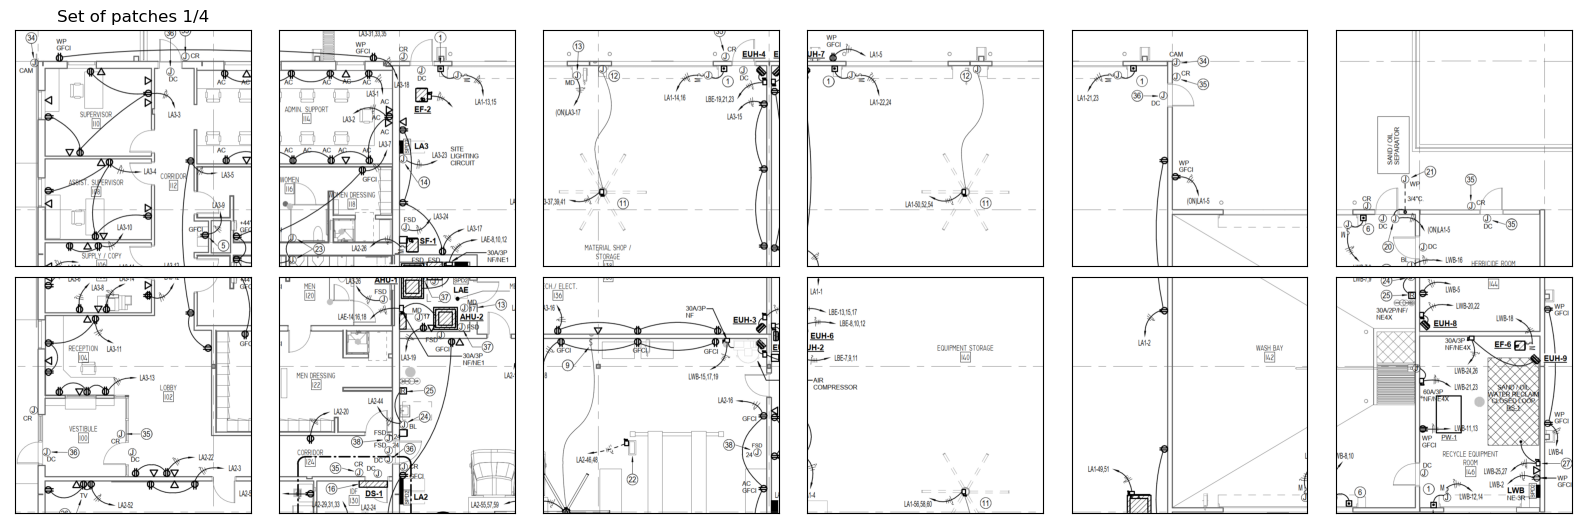

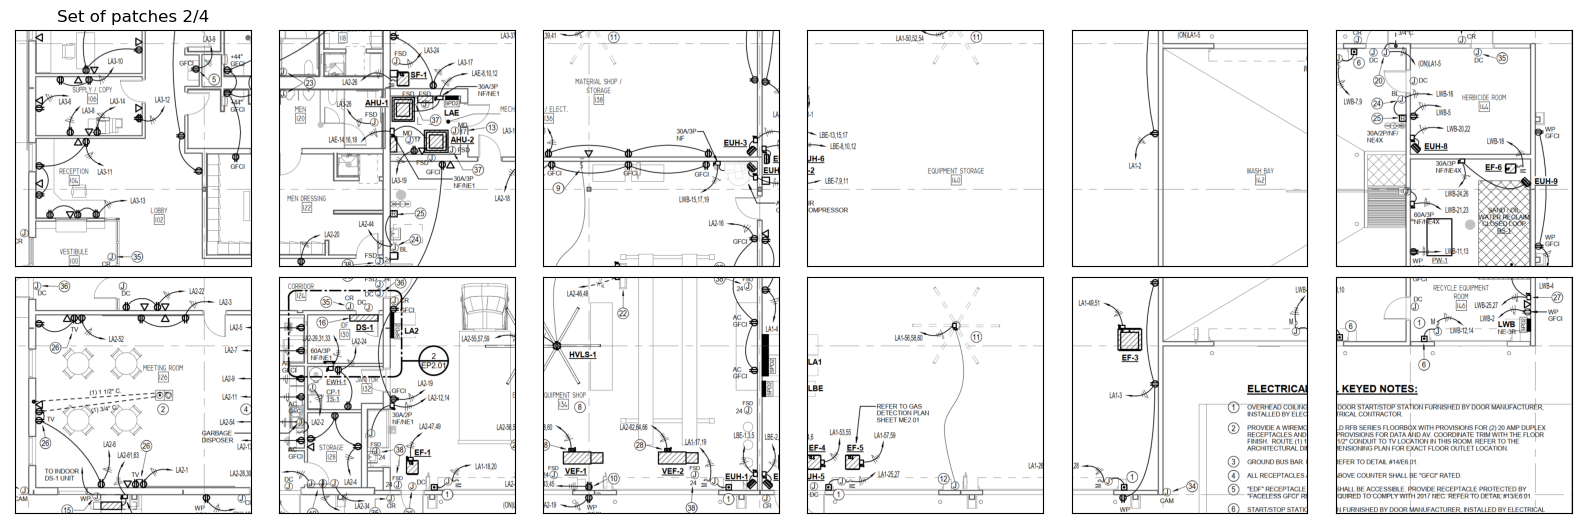

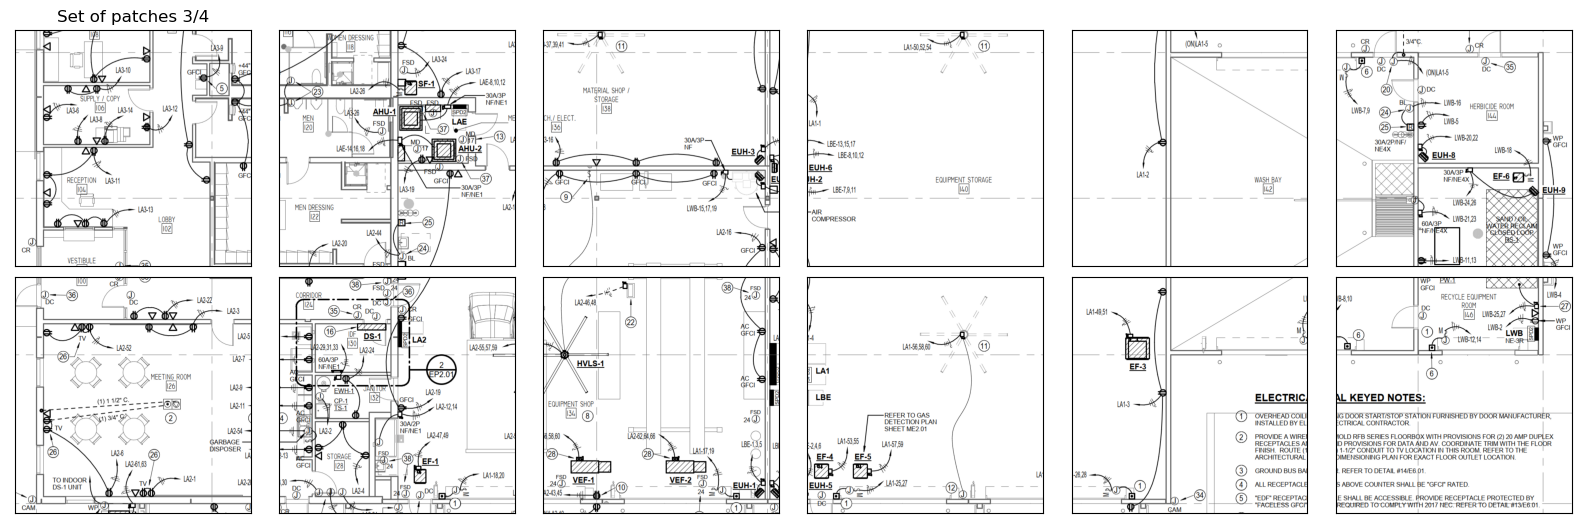

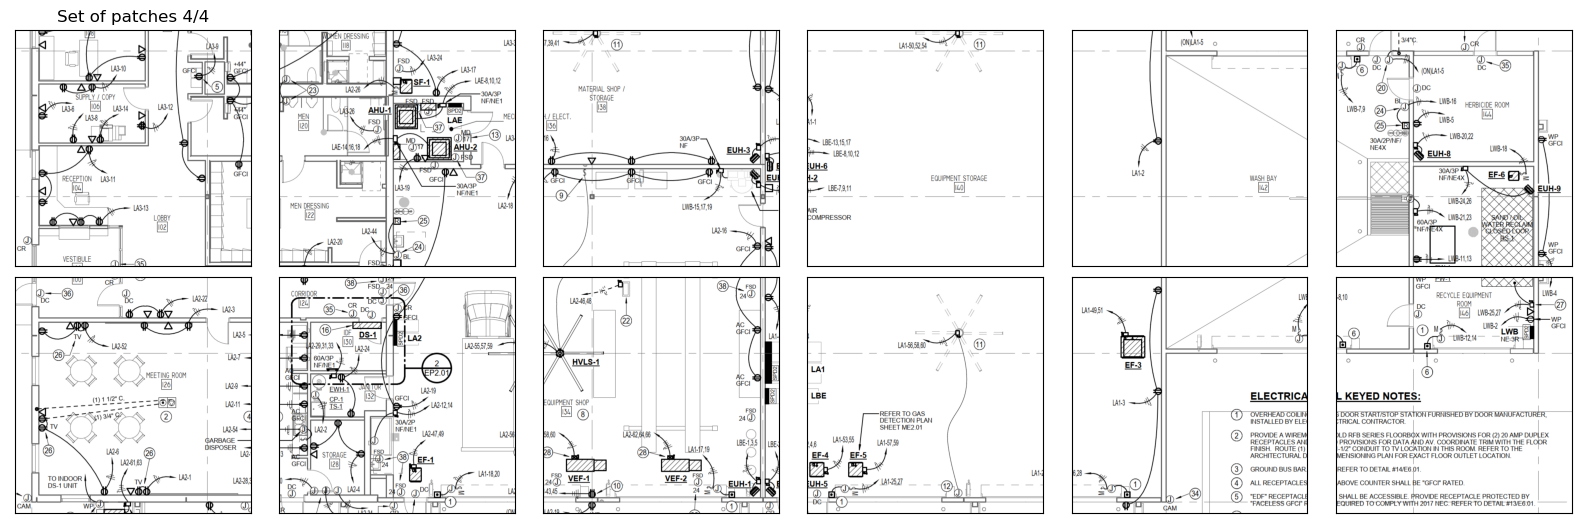

In [35]:
### Test split_image and plot_patches functions ###


out = split_image(inputfiles[5], splitxy=608, coverage_flag=1, additional_random_offsets=2)
plot_patches(out)